### [RSNA Screening Mammography Breast Cancer Detection]


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [12]:
# image load
# imagePath = '/Users/arlee/Desktop/project/project_mirero0/IMG/test_img.png'
imagePath = './IMG/test_img.png'
image = cv2.imread(imagePath)
image = image[:800,:800,:]
print(image.shape)

(800, 800, 3)


In [13]:
# 이미지를 스크립트에서 바로 확인(BGR 이미지)
def imgShow(image,title): # 이미지, 타이틀 입력
    rgbImg = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # BGR 에서 RGB로 변환
    plt.figure(figsize=(3,3))
    plt.title(title)
    plt.imshow(rgbImg)
    plt.show()
    
# 이미지를 스크립트에서 바로 확인(RGB 이미지)
def imgShow2(image,title): # 이미지, 타이틀 입력
    plt.figure(figsize=(3,3))
    plt.title(title)
    plt.imshow(image)
    plt.show()

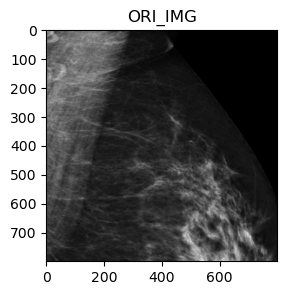

In [14]:
imgShow(image, 'ORI_IMG')

### Color Augmentation

##### Color Skew
- 각 채널을 랜덤으로 선택한 수를 곱하여 이미지의 색조, 채도, 밝기를 무작위로 조정
- 랜 덤 수는 이미지가 너무 왜곡되지 않도록 [0:6;1:4] 범위에서 선택됨

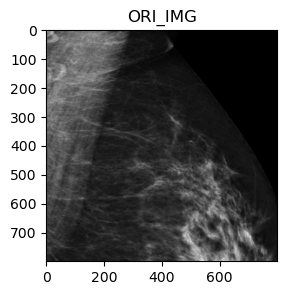

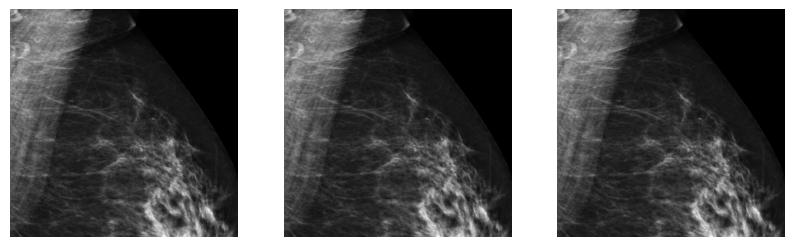

In [53]:
image = cv2.imread(imagePath)
image = image[:800,:800,:]
# image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

imgShow(image, 'ORI_IMG')

h, s, v = cv2.split(image)

images = [h,s,v]
fig,axes = plt.subplots(1,3, figsize=(10,3))
for ax, img in zip(axes, images):
    ax.imshow(img, cmap = 'gray')
    ax.axis('off') # 축 제거

plt.show()


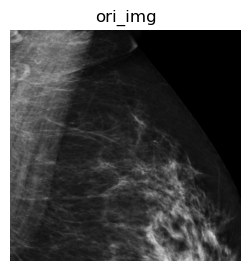

AttributeError: module 'cv2' has no attribute 'COLOR_HSV2GRAY'

In [81]:
image = cv2.imread(imagePath)
image = image[:800,:800,:]

# 이미지 시각화
plt.figure(figsize=(3, 3))
plt.title('ori_img')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

h, s, v = cv2.split(image)

h = h * np.random.uniform(low=0, high=6)
s = s * np.random.uniform(low=1, high=4)
v = v * np.random.uniform(low=0, high=6)

# HSV 채널 병합
merge_image = cv2.merge((h, s, v))

# 이미지 값을 [0, 1] 범위로 클리핑
merge_image = np.clip(merge_image / merge_image.max(), 0, 1)

# HSV 이미지를 RGB로 변환 (matplotlib는 RGB 이미지를 필요로 합니다)
merge_image_rgb = cv2.cvtColor((merge_image * 255).astype(np.uint8), cv2.COLOR_HSV2RGB)
# RGB 이미지를 회색조로 변환
merge_image_gray = cv2.cvtColor(merge_image_rgb, cv2.COLOR_RGB2GRAY)

merge_image_gray = merge_image.copy()
print(merge_image_gray.shape)

# 이미지 시각화 (회색조)
plt.figure(figsize=(3, 3))
plt.title('color_skew_img')
plt.imshow(merge_image_gray, cmap='gray')
plt.axis('off')
plt.show()

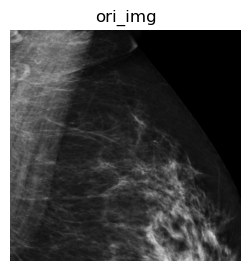

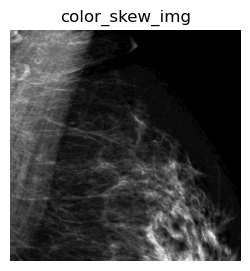

In [118]:
image = cv2.imread(imagePath)
image = image[:800,:800,:]

# 이미지 시각화
plt.figure(figsize=(3, 3))
plt.title('ori_img')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

h, s, v = cv2.split(image)

h = h * np.random.uniform(low=0, high=6)
s = s * np.random.uniform(low=1, high=4)
v = v * np.random.uniform(low=0, high=6)

# HSV 채널 병합
merge_image = cv2.merge((h, s, v))

# 이미지 값을 [0, 255] 범위로 클리핑
merge_image = np.clip(merge_image, 0, 255).astype(np.uint8)
# # 이미지를 BGR로 변환
# merge_image_bgr = cv2.cvtColor(merge_image, cv2.COLOR_HSV2BGR)
# # 이미지를 회색조로 변환
# merge_image_gray = cv2.cvtColor(merge_image_bgr, cv2.COLOR_BGR2GRAY)

# 이미지 값을 [0, 1] 범위로 클리핑
merge_image = np.clip(merge_image / merge_image.max(), 0, 1)
# 이미지를 [0, 255] 범위로 변환
merge_image_uint8 = (merge_image * 255).astype(np.uint8)
# 이미지를 BGR로 변환
merge_image_bgr = cv2.cvtColor(merge_image_uint8, cv2.COLOR_HSV2BGR)
# 이미지를 회색조로 변환
merge_image_gray = cv2.cvtColor(merge_image_bgr, cv2.COLOR_BGR2GRAY)




# 이미지 시각화 (회색조)
plt.figure(figsize=(3, 3))
plt.title('color_skew_img')
plt.imshow(merge_image_gray, cmap='gray')
plt.axis('off')
plt.show()

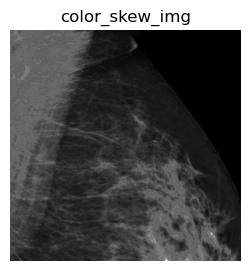

In [114]:
# importlib을 사용하여 모듈 다시 로드
import importlib
import image_augmentor
importlib.reload(image_augmentor)

from image_augmentor import ImageAugmentor

imagePath = './IMG/test_img.png'
image = cv2.imread(imagePath)
image = image[:800,:800,:]

aug_hsv_img = ImageAugmentor.augment_hsv(image)

# 이미지 시각화 (회색조)
plt.figure(figsize=(3, 3))
plt.title('color_skew_img')
plt.imshow(aug_hsv_img, cmap='gray')
plt.axis('off')
plt.show()

##### RGB Norm
- 각 채널의 평균값을 해당 채널의 값에서 빼고 채널의 표준 편차로 나누어 이니지의 RGB 채널을 정규화
- 이미지의 값 표준화를 통해 모델의 성능 개선

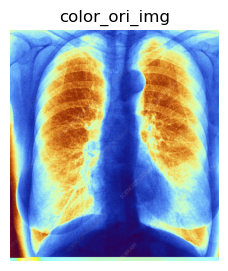

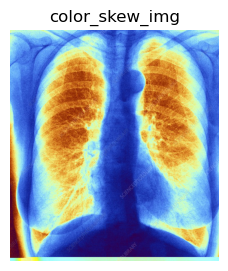

In [121]:
imagePath = './IMG/test_img_c.jpg'
image = cv2.imread(imagePath)
image = image[:800,:800,:]
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

r,g,b = cv2.split(image)

r = (r - np.mean(r)) / np.std(r)
g = (g - np.mean(g)) / np.std(g)
b = (b - np.mean(b)) / np.std(b)

r = ((r - r.min()) / (r.max() - r.min()) * 255).astype(np.uint8)
g = ((g - g.min()) / (g.max() - g.min()) * 255).astype(np.uint8)
b = ((b - b.min()) / (b.max() - b.min()) * 255).astype(np.uint8)

images = [r,g,b]

merge_image = cv2.merge((r,g,b))

plt.figure(figsize=(3, 3))
plt.title('color_ori_img')
plt.imshow(image)
plt.axis('off')
plt.show()

plt.figure(figsize=(3, 3))
plt.title('color_skew_img')
plt.imshow(merge_image)
plt.axis('off')
plt.show()


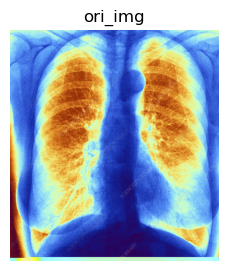

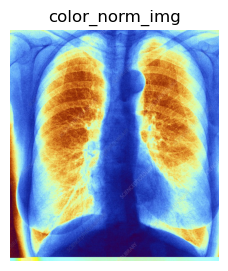

In [124]:
# importlib을 사용하여 모듈 다시 로드
import importlib
import image_augmentor
importlib.reload(image_augmentor)

# 필요한 라이브러리 임포트
import cv2
from image_augmentor import ImageAugmentor


imagePath = './IMG/test_img_c.jpg'
image = cv2.imread(imagePath)
image = image[:800,:800,:]
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


color_norm_img = ImageAugmentor.rgb_norm(image)


plt.figure(figsize=(3, 3))
plt.title('ori_img')
plt.imshow(image)
plt.axis('off')
plt.show()


plt.figure(figsize=(3, 3))
plt.title('color_norm_img')
plt.imshow(color_norm_img)
plt.axis('off')
plt.show()


In [ ]:
def black_and_white(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

##### Ben Graham: Greyscale + Gaussian Blur
- 이미지를 회색조로 변환하고 가우시안 블러 적용: 이미지의 노이즈나 서부 사항 부드럽게

In [ ]:
def ben_graham(image):
  image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  image = cv2.GaussianBlur(image, (5,5), 0)
  return image

In [128]:
# Hue, Saturation, Brightness
# : HLS 색 공간으로 변환 _ 이미지를 색조, 채도, 밝기 채널로 분리
def hsb(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

# LUV Color Space
# : LUV 색 공간으로 변환 _ 인지적으로 균일하도록 설계 되었기때문에 보다 정확한 색상 비교 가능
def luv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2LUV)

# Alpha Channel
# : 이미지에 알파 채널을 추가 _ 투명 효과에 사용할 수 있음
def alpha_channel(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)

# YX Color Space
# : XYZ 색 공간으로 변환 _ device에 독립적인 색 공간으로 더 정확한 색상 표현 가능
def xyz(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2XYZ)

# Luma Chroma
# : YCrCb 색 공간으로 변환 _ 루마(밝기), 크로마(색상) 채널로 분리
def luma_chroma(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

# CIE Lab
# : CIE 색 공간으로 변환 _ 지각적으로 균인하도록 설계되었으므로, 더 정확한 색상 비교 가능
def cie_lab(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2Lab)

# YUV Color Space
# : YUV 색 공간으로 변환 _ 이미지를 휘도(밝기)와 색차(색상) 채널로 분리
def yuv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

##### Center Crop
- [3/4,4/3]의 종횡비를 가진 직사각형 영역을 무작위로 자른 다음, [8%,100%] 사이의 인자로 무작위로 자르기 크기를 조정하고, 마지막으로 자르기 크기를 img_sizeXimg_size 사각형으로 조정 
- 각 배치에서 무작위로 수행됩니다.

In [ ]:
# 필요한 라이브러리 임포트
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 읽기
image_path = './IMG/test_img.png'  # 실제 이미지 경로로 변경
image = Image.open(image_path)

# transforms.RandomCrop을 사용하여 이미지 자르기
crop_transform = transforms.RandomCrop((100, 100))
cropped_image = crop_transform(image)

# 결과 이미지 시각화
plt.figure(figsize=(5, 5))
plt.title('Randomly Cropped Image')
plt.imshow(cropped_image)
plt.axis('off')
plt.show()

##### Flippings
- 이미지에 무작위 수평 뒤집기의 확률을 추가(ex.확률이 0.5이면 이미지가 수평으로 뒤집힐 확률은 50%)

In [ ]:
def flippings(image):
    if np.random.uniform() < 0.5:
        image = cv2.flip(image, 1)
    return image

##### Random Crop
- 

In [ ]:
# Random Crop


# Random Resized Crop

# Color Jitter

# Random Affine

# Random Horizontal Flip

# Random Vertical Flip

# Random Perspective

# Random Rotation

# Random Invert

# Random Posterize

# Random Solarize

# Random Autocontrast

# Random Equalize

# 

##### Advanced Augmentations


In [ ]:
from autoaugment import AutoAugment

auto_augment = AutoAugment()
image = auto_augment(image)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(validation_images, validation_labels))
